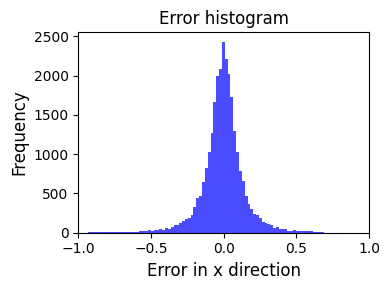

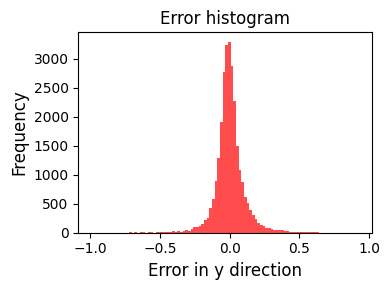

In [8]:
import numpy as np
import matplotlib.pyplot as plt

result_path = 'results/feature_error.txt'

# Lists for error in x/y and also original x/y positions (for spatial statistics)
exList = []
eyList = []
xList = []
yList = []
dList = []
with open(result_path, 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        line = line.strip()
        ex = float(line.split()[1])
        ey = float(line.split()[2])
        x = float(line.split()[3])
        y = float(line.split()[4])
        d = np.linalg.norm([float(x), float(y)])

        # NOTE subtract the bias
        # 真逆天，为什么会有bias？？？

        exList.append(float(ex) - 0.05)
        eyList.append(float(ey) - 0.03)
        xList.append(x)
        yList.append(y)
        dList.append(d)

# plot hist with 100 bins
fontsize = 12
plt.figure(figsize=(4, 3))
plt.hist(exList, bins=100, color='blue', alpha=0.7)
plt.xlim(-1,1)
plt.xlabel('Error in x direction', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
plt.title('Error histogram', fontsize=fontsize)
plt.tight_layout()
plt.savefig('error_histogram_x.png', dpi=200)
plt.show()

plt.figure(figsize=(4, 3))
plt.hist(eyList, bins=100, color='red', alpha=0.7)
plt.xlabel('Error in y direction', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
plt.title('Error histogram', fontsize=fontsize)
plt.tight_layout()
plt.savefig('error_histogram_y.png', dpi=200)
plt.show()

In [9]:
print("mean in x direction: ", np.mean(exList))
print("mean in y direction: ", np.mean(eyList))
print("std in x direction: ", np.std(exList))
print("std in y direction: ", np.std(eyList))
print("covariance of x, y directoon: ", np.cov(exList, eyList)[0][1])
print("coefficient of x, y direction: ", np.corrcoef(exList, eyList)[0][1])

mean in x direction:  -0.004242595771098859
mean in y direction:  8.216776832341967e-06
std in x direction:  0.15149714542642329
std in y direction:  0.10892173916867737
covariance of x, y directoon:  0.0005913051487856442
coefficient of x, y direction:  0.03583247309247756


Total samples: 27383, kept after trimming: 26013 (95.00%)
Radius threshold (keep 95%): r <= 0.3928
Max sample count in a grid cell:  95
Non-empty cells:  3226


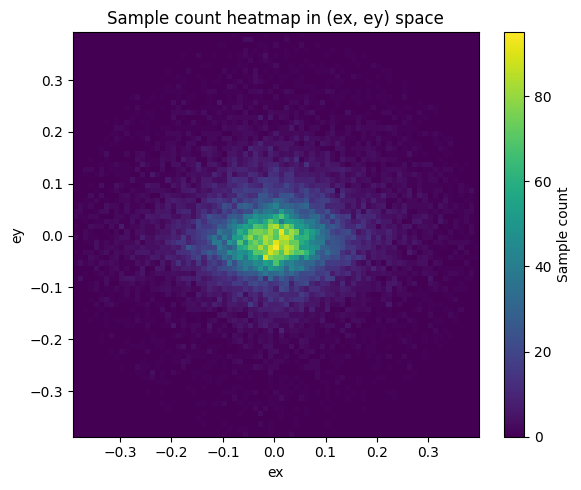

In [ ]:
# Heatmap: count samples in (ex, ey) error space with 1cm step (0.01)

# Here x-axis is ex value, y-axis is ey value.
# Trim exactly 5% samples by radial distance r = sqrt(ex^2 + ey^2) (keep 95%).
grid_size = 0.01

exArr_all = np.asarray(exList, dtype=float)
eyArr_all = np.asarray(eyList, dtype=float)

# Trim 5% tail samples by radius so we keep ~95% points total
keep_ratio = 0.95
r = np.sqrt(exArr_all**2 + eyArr_all**2)
r_thr = np.quantile(r, keep_ratio)
mask = r <= r_thr
exArr = exArr_all[mask]
eyArr = eyArr_all[mask]

print(f"Total samples: {len(exArr_all)}, kept after trimming: {len(exArr)} ({len(exArr)/len(exArr_all)*100:.2f}%)")
print(f"Radius threshold (keep {keep_ratio*100:.0f}%): r <= {r_thr:.4f}")

ex_min = exArr.min()
ex_max = exArr.max()
ey_min = eyArr.min()
ey_max = eyArr.max()

# Number of bins (add 1 so max falls into the last bin)
nx = int(np.floor((ex_max - ex_min) / grid_size)) + 1
ny = int(np.floor((ey_max - ey_min) / grid_size)) + 1

# Bin indices
ix = np.floor((exArr - ex_min) / grid_size).astype(int)
iy = np.floor((eyArr - ey_min) / grid_size).astype(int)

count_grid = np.zeros((ny, nx), dtype=int)
for i in range(len(exArr)):
    count_grid[iy[i], ix[i]] += 1

print("Max sample count in a grid cell: ", count_grid.max())
print("Non-empty cells: ", int(np.sum(count_grid > 0)))

# Plot heatmap (counts)
plt.figure(figsize=(6, 5))
im = plt.imshow(
    count_grid,
    origin='lower',
    extent=[ex_min, ex_min + nx * grid_size, ey_min, ey_min + ny * grid_size],
    aspect='auto',
    cmap='viridis'
 )
plt.colorbar(im, label='Sample count')
plt.xlabel('ex')
plt.ylabel('ey')
plt.title('Sample count heatmap in (ex, ey) space')
plt.tight_layout()
plt.savefig('heatmap_sample_count_ex_ey.png', dpi=200)
plt.show()